In [1]:
from keras.preprocessing import image
from keras.applications.vgg16 import vgg16
# from keras.applications.vgg16 import preprocess_input
# from keras.applications.vgg16 import decode_predictions
import numpy as np

from scipy.spatial import distance
from keras.models import Model
from keras.applications import resnet50
import cv2
from random import shuffle

Using TensorFlow backend.


In [19]:
# Creating data
import os

counter = 0
root = 'C:\\Users\\Abhishek\\Desktop\\ChatBot\\poc\\ut-zap50k-images-square'
data = []
data_1 = []
os.chdir(root)
print("In:",os.getcwd())
for dirs1 in os.listdir(root):
    if counter < 100:
    #     print(dirs1)
        path1 = root+"\\"+dirs1
        for dirs2 in os.listdir(path1):
    #         print(dirs2)
            path2 = path1 + "\\" + dirs2
            for dirs3 in os.listdir(path2):
    #             print(dirs3)
                path3 = path2 + "\\" + dirs3
                for jpg in os.listdir(path3):                
    #                 print(counter)
                    path4 = path3+"\\"+jpg
                    img = image.load_img(path4, target_size=(224, 224))
#                     img_1 = cv2.resize(img, (0,0), fx=0.5, fy=0.5) 
    #                 print(img.shape)
    #                 img1=img[np.newaxis,:]
    #                 print(img.shape)
    #                 data[counter][0]=counter
    #                 data[counter][1]=np.copy(img)
                    if img is not None:
#                         img = cv2.resize(img, (56, 56))
#                         img_1=img.astype('float32')
#                         img_1=img_1/255
    #                     img = image.load_img(img_path, target_size=(224, 224))
                        x = image.img_to_array(img)
                        np.expand_dims(x, axis=0)
                        x = preprocess_input(x)
                        counter = counter + 1
                        data.append(x)
#                         data_1.append(img_1)
    #                 print(path3+"\\"+jpg)
print(counter)
shuffle(data)
print(len(data))
# print(len(data_1))

In: C:\Users\Abhishek\Desktop\ChatBot\poc\ut-zap50k-images-square
12834
12834


In [21]:
import os

counter = 0
root = 'C:\\Users\\Abhishek\\Desktop\\ChatBot\\poc\\ut-zap50k-images-square\\data'
data = []
# os.chdir(root)
for jpg in os.listdir(root):
    img = image.load_img(root+"\\"+jpg, target_size=(224, 224))
    x = image.img_to_array(img)
    data.append(x)
    
print(len(data))

6


In [35]:
data_10 = [cv2.flip(data[0],1)]
print(data_10[0].shape)
for i in range(10):
    data_10.append(data[i])
print(len(data_10))
print(data_10[5].shape)

(224, 224, 3)
11
(224, 224, 3)


In [22]:
# Resnet
model = resnet50.ResNet50(weights='imagenet', include_top=False, pooling='avg')
print("Model Loaded")
img = np.expand_dims(data[0], axis=0)
vec = model.predict(img)
features_vec=vec
for i in range(1,len(data)):
    print(i)
    img = np.expand_dims(data[i], axis=0)
    img = resnet50.preprocess_input(img)
#     np.vstack((features_vec,)) 
    vec = model.predict(img)
    print(vec.shape)
    features_vec = np.vstack((features_vec,vec))
#     features_vec.append(vec[0])
print(features_vec.shape)
print(features_vec[0].shape)

Model Loaded
1
(1, 2048)
2
(1, 2048)
3
(1, 2048)
4
(1, 2048)
5
(1, 2048)
(6, 2048)
(2048,)


In [27]:
print(features_vec[0])
print(1-distance.cosine(features_vec[0],features_vec[0]))

[ 0.0696808   1.93162417  0.3550626  ...,  0.          0.          0.15914233]
1.0


In [23]:
m, n = features_vec.shape
distances = np.zeros((m,m))
for i in range(m):
    for j in range(m):
        distances[i,j] = round(1-distance.cosine(features_vec[i],features_vec[j]),3)
        
print(distances)

[[ 1.     0.625  0.495  0.469  0.486  0.477]
 [ 0.625  1.     0.682  0.554  0.555  0.549]
 [ 0.495  0.682  1.     0.65   0.642  0.689]
 [ 0.469  0.554  0.65   1.     0.708  0.697]
 [ 0.486  0.555  0.642  0.708  1.     0.693]
 [ 0.477  0.549  0.689  0.697  0.693  1.   ]]


In [24]:
m, n = features_vec.shape
distances = np.zeros((m,m))
for i in range(m):
    for j in range(m):
        distances[i,j] = round(distance.euclidean(features_vec[i],features_vec[j]),3)
        
print(distances)

[[  0.     32.266  36.139  37.865  39.032  37.009]
 [ 32.266   0.     28.109  34.036  35.69   33.622]
 [ 36.139  28.109   0.     28.948  31.09   26.696]
 [ 37.865  34.036  28.948   0.     28.637  27.15 ]
 [ 39.032  35.69   31.09   28.637   0.     29.003]
 [ 37.009  33.622  26.696  27.15   29.003   0.   ]]


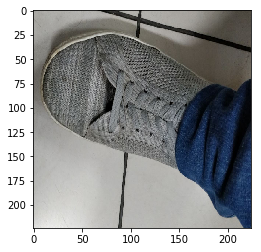

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(data[1]/255)

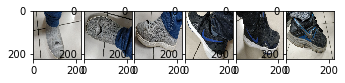

In [14]:
fig = plt.figure()
j=0
for i in range(0,6):
#     ax = fig.add_subplot(2,11,i+1)
#     ax.imshow(data_10[i]/255)
    ax1 = plt.subplot2grid((1,20),(0,i*3),rowspan=1,colspan=3)
#     ax2 = plt.subplot2grid((6,33),(3,i*3),rowspan=3,colspan=2)
    ax1.imshow(data[j]/255)
    j=j+1
#     ax2.imshow(data_10[j]/255)
plt.savefig("head_2.jpg")

# fig = plt.figure()
# j=0
# for i in range(0,3):
# #     ax = fig.add_subplot(2,11,i+1)
# #     ax.imshow(data_10[i]/255)
#     ax1 = plt.subplot2grid((33,2),(i*2,0),rowspan=2,colspan=2)
# #     ax2 = plt.subplot2grid((6,33),(3,i*3),rowspan=3,colspan=2)
#     ax1.imshow(data_10[i]/255)
# #     j=j+1
# #     ax2.imshow(data_10[j]/255)
# plt.savefig("head_1.jpg")

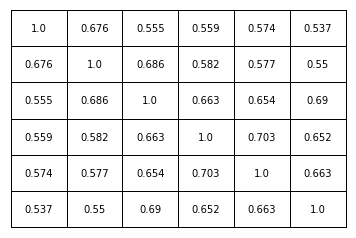

In [15]:
import numpy as np
import matplotlib.pylab as pl

nx,ny = distances.shape
# data = np.random.randint(0,10,size=(ny,nx))

pl.figure()
tb = pl.table(cellText=distances, loc=(0,0), cellLoc='center')

tc = tb.properties()['child_artists']
for cell in tc: 
    cell.set_height(1/ny)
    cell.set_width(1/nx)

ax = pl.gca()
ax.set_xticks([])
ax.set_yticks([])
pl.savefig("sim.jpg")

IndexError: too many indices for array

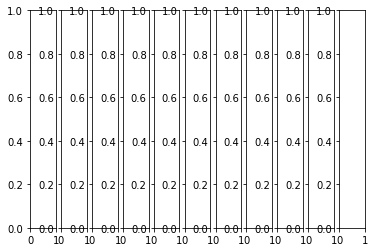

In [86]:
f, axarr = plt.subplots(1,11)
for i in range(5):
    axarr[0,i].imshow(data_10[i]/255)

axarr.show()

In [26]:
## Tranfer learning and making shoe classifier

from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
# from keras.applications.vgg16 import preprocess_input
# from keras.applications.vgg16 import decode_predictions
import numpy as np

from scipy.spatial import distance
from keras.models import Model
from keras.applications import resnet50

from keras.models import Model

model = VGG16(weights='imagenet', include_top=True)
model_extractfeatures = Model(input=model.input, output=model.get_layer('fc2').output)
print("Model Loaded")

img = np.expand_dims(data[0], axis=0)
vec = model_extractfeatures.predict(img)
features_vec=vec
for i in range(1,len(data)):
    print(i)
    img = np.expand_dims(data[i], axis=0)
    img = vgg16.preprocess_input(img)
#     np.vstack((features_vec,)) 
    vec = model_extractfeatures.predict(img)
    print(vec.shape)
    features_vec = np.vstack((features_vec,vec))
#     features_vec.append(vec[0])
print(features_vec.shape)
print(features_vec[0].shape)


C:\Users\Abhishek\Anaconda3\envs\carnd-term1\lib\site-packages\ipykernel\__main__.py:16: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("fc..., inputs=Tensor("in...)`


Model Loaded
1
(1, 4096)
2
(1, 4096)
3
(1, 4096)
4
(1, 4096)
5
(1, 4096)
(6, 4096)
(4096,)


In [27]:
m, n = features_vec.shape
distances = np.zeros((m,m))
for i in range(m):
    for j in range(m):
        distances[i,j] = round(1-distance.cosine(features_vec[i],features_vec[j]),3)
        
print(distances)

[[ 1.     0.433  0.429  0.405  0.443  0.427]
 [ 0.433  1.     0.503  0.45   0.407  0.361]
 [ 0.429  0.503  1.     0.564  0.543  0.627]
 [ 0.405  0.45   0.564  1.     0.698  0.659]
 [ 0.443  0.407  0.543  0.698  1.     0.697]
 [ 0.427  0.361  0.627  0.659  0.697  1.   ]]


In [28]:
m, n = features_vec.shape
distances = np.zeros((m,m))
for i in range(m):
    for j in range(m):
        distances[i,j] = round(distance.euclidean(features_vec[i],features_vec[j]),3)
        
print(distances)

[[   0.     132.145   98.404  106.367  109.363  119.07 ]
 [ 132.145    0.     128.152  136.569  144.67   154.967]
 [  98.404  128.152    0.      97.476  104.808  101.621]
 [ 106.367  136.569   97.476    0.      88.121   99.327]
 [ 109.363  144.67   104.808   88.121    0.      96.009]
 [ 119.07   154.967  101.621   99.327   96.009    0.   ]]
